In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf

In [ ]:
get_ticker = input("Enter the ticker: ")
# get_ticker = "TSLA"

stock_data = yf.Ticker(get_ticker)
data = stock_data.history(period="1y")
data = data.reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2024-02-20 00:00:00-05:00,196.130005,198.600006,189.130005,193.759995,104545800,0.0,0.0
1,2024-02-21 00:00:00-05:00,193.360001,199.440002,191.949997,194.770004,103844000,0.0,0.0
2,2024-02-22 00:00:00-05:00,194.000000,198.320007,191.360001,197.410004,92739500,0.0,0.0
3,2024-02-23 00:00:00-05:00,195.309998,197.570007,191.500000,191.970001,78841900,0.0,0.0
4,2024-02-26 00:00:00-05:00,192.289993,201.779999,192.000000,199.399994,111747100,0.0,0.0
...,...,...,...,...,...,...,...,...
245,2025-02-11 00:00:00-05:00,345.799988,349.369995,325.100006,328.500000,118543400,0.0,0.0
246,2025-02-12 00:00:00-05:00,329.940002,346.399994,329.119995,336.510010,105382700,0.0,0.0
247,2025-02-13 00:00:00-05:00,345.000000,358.690002,342.850006,355.940002,89441500,0.0,0.0
248,2025-02-14 00:00:00-05:00,360.619995,362.000000,347.500000,355.839996,68277300,0.0,0.0


In [ ]:
data.shape

(250, 8)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype                           
---  ------        --------------  -----                           
 0   Date          250 non-null    datetime64[ns, America/New_York]
 1   Open          250 non-null    float64                         
 2   High          250 non-null    float64                         
 3   Low           250 non-null    float64                         
 4   Close         250 non-null    float64                         
 5   Volume        250 non-null    int64                           
 6   Dividends     250 non-null    float64                         
 7   Stock Splits  250 non-null    float64                         
dtypes: datetime64[ns, America/New_York](1), float64(6), int64(1)
memory usage: 15.8 KB


In [ ]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.0,250.0
mean,253.575840,259.242040,247.721240,253.493360,9.079242e+07,0.0,0.0
std,87.716224,90.041211,84.639120,87.425494,3.320267e+07,0.0,0.0
min,140.559998,144.440002,138.800003,142.050003,3.716760e+07,0.0,0.0
25%,182.025002,184.334999,177.095001,179.995003,6.769378e+07,0.0,0.0
50%,221.494995,225.395004,216.959999,220.794998,8.291510e+07,0.0,0.0
75%,334.305008,344.087502,323.107498,328.497498,1.043894e+08,0.0,0.0
max,475.899994,488.540009,457.510010,479.859985,2.438697e+08,0.0,0.0


In [ ]:
data['Date'] = pd.to_datetime(data['Date']).dt.strftime('%d/%m/%Y')

In [ ]:
data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,20/02/2024,196.130005,198.600006,189.130005,193.759995,104545800,0.0,0.0
1,21/02/2024,193.360001,199.440002,191.949997,194.770004,103844000,0.0,0.0
2,22/02/2024,194.000000,198.320007,191.360001,197.410004,92739500,0.0,0.0
3,23/02/2024,195.309998,197.570007,191.500000,191.970001,78841900,0.0,0.0
4,26/02/2024,192.289993,201.779999,192.000000,199.399994,111747100,0.0,0.0


In [ ]:
data['Date'] = pd.to_datetime(data['Date'])  # Convert to datetime format
data = data.sort_values(by='Date', ascending=False)
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
249,2025-02-18,355.010010,359.100006,350.019989,354.109985,51455200,0.0,0.0
248,2025-02-14,360.619995,362.000000,347.500000,355.839996,68277300,0.0,0.0
247,2025-02-13,345.000000,358.690002,342.850006,355.940002,89441500,0.0,0.0
246,2025-02-12,329.940002,346.399994,329.119995,336.510010,105382700,0.0,0.0
245,2025-02-11,345.799988,349.369995,325.100006,328.500000,118543400,0.0,0.0
...,...,...,...,...,...,...,...,...
4,2024-02-26,192.289993,201.779999,192.000000,199.399994,111747100,0.0,0.0
3,2024-02-23,195.309998,197.570007,191.500000,191.970001,78841900,0.0,0.0
2,2024-02-22,194.000000,198.320007,191.360001,197.410004,92739500,0.0,0.0
1,2024-02-21,193.360001,199.440002,191.949997,194.770004,103844000,0.0,0.0


In [ ]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=data['Date'],
                open=data['Open'],
                high=data['High'],
                low=data['Low'],
                close=data['Close'])])
fig.show()


In [ ]:
fig = px.line(data, x='Date', y=['Open', 'Close'], title=f'{get_ticker} Open and Close Prices')
fig.show()

In [ ]:
fig = px.line(data, x='Date', y=['High', 'Low'], title=f'{get_ticker} High and Low Prices')
fig.show()

In [ ]:
data.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


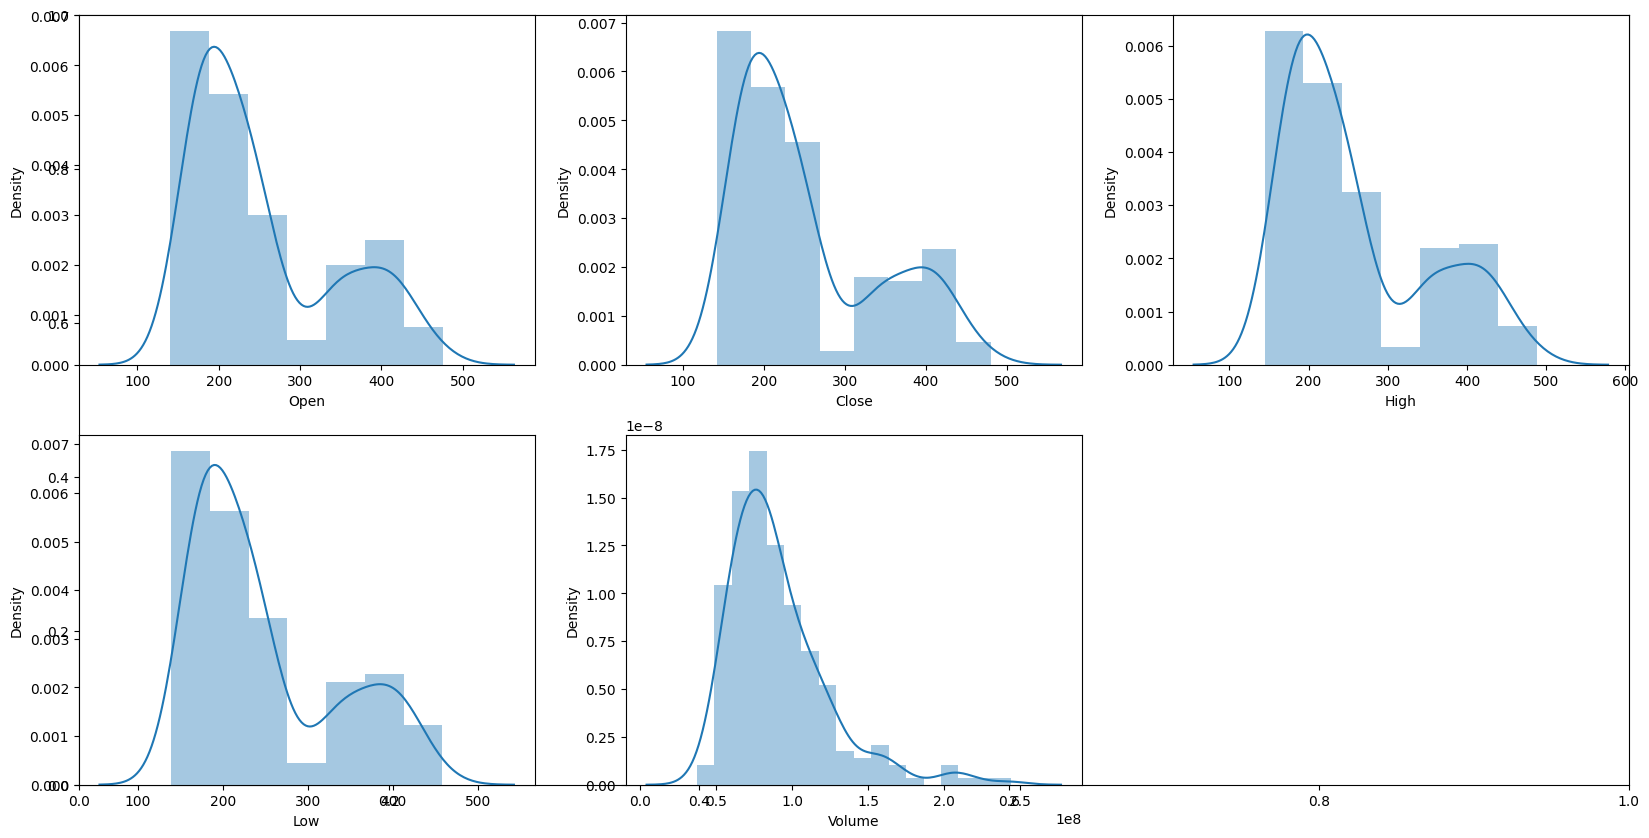

In [ ]:
features = ['Open','Close','High','Low','Volume']
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.distplot(data[col])
plt.show()

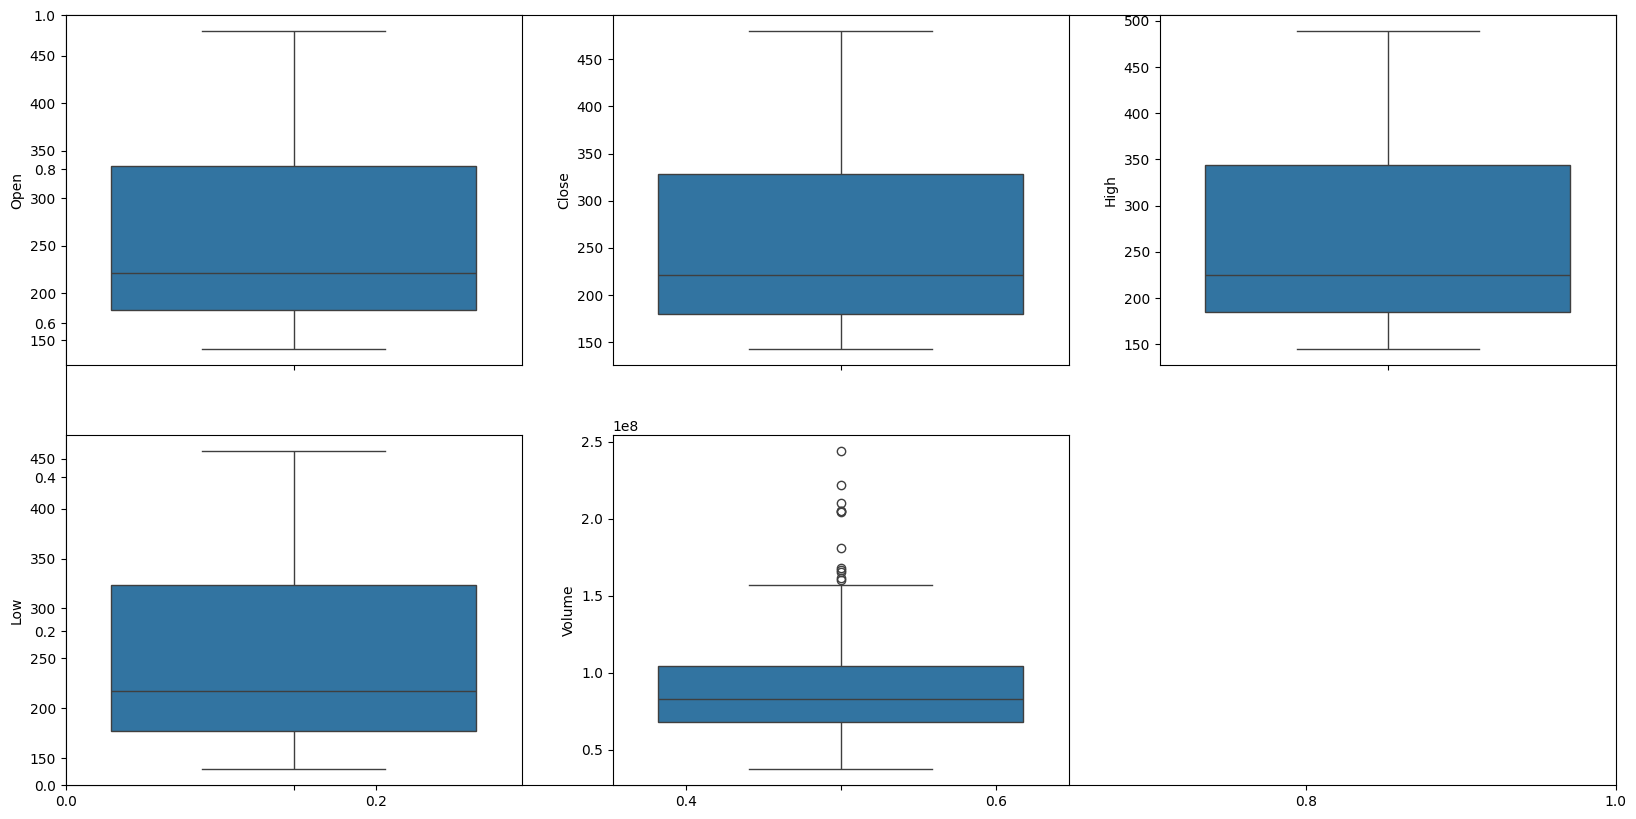

In [ ]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(data[col])
plt.show()

In [ ]:
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

print(data.head())

          Date        Open        High         Low       Close     Volume  \
249 2025-02-18  355.010010  359.100006  350.019989  354.109985   51455200   
248 2025-02-14  360.619995  362.000000  347.500000  355.839996   68277300   
247 2025-02-13  345.000000  358.690002  342.850006  355.940002   89441500   
246 2025-02-12  329.940002  346.399994  329.119995  336.510010  105382700   
245 2025-02-11  345.799988  349.369995  325.100006  328.500000  118543400   

     Dividends  Stock Splits  Day  Month  Year  
249        0.0           0.0   18      2  2025  
248        0.0           0.0   14      2  2025  
247        0.0           0.0   13      2  2025  
246        0.0           0.0   12      2  2025  
245        0.0           0.0   11      2  2025  


In [ ]:
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
data

,Date,Open,High,Low,Close,Volume,Day,Month,Year
249,2025-02-18,355.010010,359.100006,350.019989,354.109985,51455200,18,2,2025
248,2025-02-14,360.619995,362.000000,347.500000,355.839996,68277300,14,2,2025
247,2025-02-13,345.000000,358.690002,342.850006,355.940002,89441500,13,2,2025
246,2025-02-12,329.940002,346.399994,329.119995,336.510010,105382700,12,2,2025
245,2025-02-11,345.799988,349.369995,325.100006,328.500000,118543400,11,2,2025
...,...,...,...,...,...,...,...,...,...
4,2024-02-26,192.289993,201.779999,192.000000,199.399994,111747100,26,2,2024
3,2024-02-23,195.309998,197.570007,191.500000,191.970001,78841900,23,2,2024
2,2024-02-22,194.000000,198.320007,191.360001,197.410004,92739500,22,2,2024
1,2024-02-21,193.360001,199.440002,191.949997,194.770004,103844000,21,2,2024


In [ ]:
data['is_quarter_end'] = np.where(data['Month']%3==0,1,0)
data

,Date,Open,High,Low,Close,Volume,Day,Month,Year,is_quarter_end
249,2025-02-18,355.010010,359.100006,350.019989,354.109985,51455200,18,2,2025,0
248,2025-02-14,360.619995,362.000000,347.500000,355.839996,68277300,14,2,2025,0
247,2025-02-13,345.000000,358.690002,342.850006,355.940002,89441500,13,2,2025,0
246,2025-02-12,329.940002,346.399994,329.119995,336.510010,105382700,12,2,2025,0
245,2025-02-11,345.799988,349.369995,325.100006,328.500000,118543400,11,2,2025,0
...,...,...,...,...,...,...,...,...,...,...
4,2024-02-26,192.289993,201.779999,192.000000,199.399994,111747100,26,2,2024,0
3,2024-02-23,195.309998,197.570007,191.500000,191.970001,78841900,23,2,2024,0
2,2024-02-22,194.000000,198.320007,191.360001,197.410004,92739500,22,2,2024,0
1,2024-02-21,193.360001,199.440002,191.949997,194.770004,103844000,21,2,2024,0


In [ ]:
data['is_quarter_end'].unique().sum()

1

##Here we go....

In [ ]:
data = stock_data.history(period="max")
data = data.reset_index()
data.sort_values(by='Date', ascending=False, inplace=True)
data = data.reset_index()
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
data.drop(['Dividends', 'Stock Splits'], axis=1, inplace=True)
print(data.shape)
data.head()

(3683, 10)


,index,Date,Open,High,Low,Close,Volume,Day,Month,Year
0,3682,2025-02-18 00:00:00-05:00,355.010010,359.100006,350.019989,354.109985,51455200,18,2,2025
1,3681,2025-02-14 00:00:00-05:00,360.619995,362.000000,347.500000,355.839996,68277300,14,2,2025
2,3680,2025-02-13 00:00:00-05:00,345.000000,358.690002,342.850006,355.940002,89441500,13,2,2025
3,3679,2025-02-12 00:00:00-05:00,329.940002,346.399994,329.119995,336.510010,105382700,12,2,2025
4,3678,2025-02-11 00:00:00-05:00,345.799988,349.369995,325.100006,328.500000,118543400,11,2,2025


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
val_data, test_data = train_test_split(data, test_size=0.2, random_state=42)
train_data, val_data = train_test_split(val_data, test_size=0.25, random_state=42)

In [ ]:
print("Train data ", train_data.shape)
print(train_data.head())
print("Val data ", val_data.shape)
print(val_data.head())
print("Test data ", test_data.shape)
print(test_data.head())

Train data  (2209, 10)
      index                      Date        Open        High         Low  \
2213   1469 2016-04-29 00:00:00-04:00   16.542667   16.562000   15.854000   
3070    612 2012-12-03 00:00:00-05:00    2.259333    2.333333    2.233333   
974    2708 2021-04-01 00:00:00-04:00  229.456665  230.806671  219.806671   
2693    989 2014-06-04 00:00:00-04:00   13.623333   13.750667   13.360000   
1671   2011 2018-06-25 00:00:00-04:00   22.007999   22.564667   21.833332   

           Close     Volume  Day  Month  Year  
2213   16.050667   81207000   29      4  2016  
3070    2.308000   31285500    3     12  2012  
974   220.583328  105895200    1      4  2021  
2693   13.599333   51411000    4      6  2014  
1671   22.200666  103969500   25      6  2018  
Val data  (737, 10)
      index                      Date        Open        High         Low  \
2004   1678 2017-02-28 00:00:00-05:00   16.279333   16.733334   16.260000   
377    3305 2023-08-16 00:00:00-04:00  228.020004  2

<Axes: title={'center': 'No. of rows per years'}, xlabel='Date', ylabel='count'>

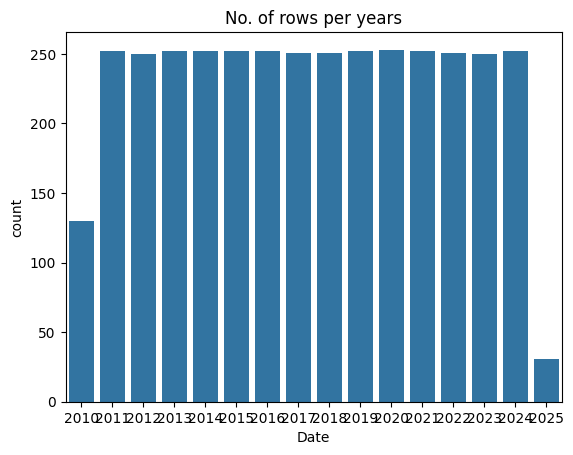

In [ ]:
plt.title("No. of rows per years")
sns.countplot(x=pd.to_datetime(data['Date']).dt.year)

### Inuts and target

In [ ]:
Inputs = ['Open', 'High', 'Low']
Target = ['Close']

In [ ]:
train_inputs = train_data[Inputs]
train_target = train_data[Target]
val_inputs = val_data[Inputs]
val_target = val_data[Target]
test_inputs = test_data[Inputs]
test_target = test_data[Target]

In [ ]:
train_inputs.describe()

,Open,High,Low
count,2209.000000,2209.000000,2209.000000
mean,85.299278,87.147703,83.227157
std,111.944981,114.439394,109.127330
min,1.186667,1.193333,1.055333
25%,12.340000,12.645333,12.167333
50%,18.631332,18.933332,18.340000
75%,184.990005,188.800003,180.690002
max,475.899994,488.540009,457.510010


In [ ]:
train_inputs.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 2213 to 3131
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2209 non-null   float64
 1   High    2209 non-null   float64
 2   Low     2209 non-null   float64
dtypes: float64(3)
memory usage: 69.0 KB


In [ ]:
data.corr()

,index,Date,Open,High,Low,Close,Volume,Day,Month,Year
index,1.000000,1.000000,0.802367,0.802258,0.803078,0.802700,0.344260,0.001820,-0.005725,0.997653
Date,1.000000,1.000000,0.802295,0.802187,0.803007,0.802629,0.344396,0.001787,-0.006209,0.997686
Open,0.802367,0.802295,1.000000,0.999720,0.999629,0.999221,0.084183,-0.002087,0.022198,0.798586
High,0.802258,0.802187,0.999720,1.000000,0.999639,0.999647,0.087751,-0.001665,0.021625,0.798514
Low,0.803078,0.803007,0.999629,0.999639,1.000000,0.999690,0.081092,-0.001218,0.022875,0.799246
Close,0.802700,0.802629,0.999221,0.999647,0.999690,1.000000,0.085162,-0.001329,0.022474,0.798896
Volume,0.344260,0.344396,0.084183,0.087751,0.081092,0.085162,1.000000,-0.039001,-0.082675,0.349293
Day,0.001820,0.001787,-0.002087,-0.001665,-0.001218,-0.001329,-0.039001,1.000000,0.002002,-0.004000
Month,-0.005725,-0.006209,0.022198,0.021625,0.022875,0.022474,-0.082675,0.002002,1.000000,-0.073940
Year,0.997653,0.997686,0.798586,0.798514,0.799246,0.798896,0.349293,-0.004000,-0.073940,1.000000


In [ ]:
train_inputs.corr()

,Open,High,Low
Open,1.000000,0.999719,0.999603
High,0.999719,1.000000,0.999617
Low,0.999603,0.999617,1.000000


<Axes: >

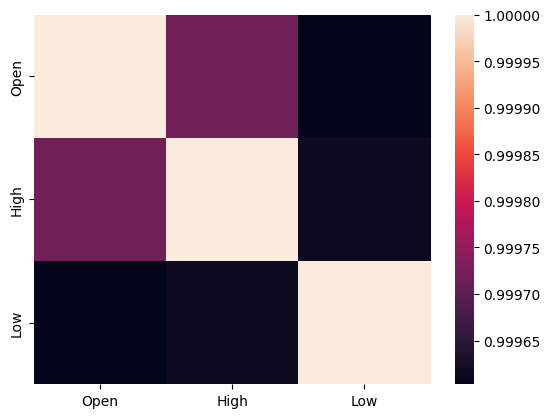

In [ ]:
sns.heatmap(train_inputs.corr())

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
%%time
model.fit(train_inputs, train_target)

CPU times: user 7.09 ms, sys: 182 µs, total: 7.27 ms
Wall time: 31.8 ms


LinearRegression()

In [ ]:
print(model.coef_.tolist())
print(model.intercept_)

[[-0.6439832389160047, 0.8125073617133027, 0.832035020972907]]
[0.03350058]


In [ ]:
train_pred = model.predict(train_inputs)
train_pred

array([[ 16.02813051],
       [  2.33258968],
       [222.68622191],
       ...,
       [298.56593529],
       [  1.97893236],
       [  1.92696535]])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
train_pred = model.predict(train_inputs)

mse = mean_squared_error(train_target, train_pred)
r2 = r2_score(train_target, train_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3.751368657436742
R-squared (R2): 0.9996992946089499


In [ ]:
got = pd.DataFrame({'Actual': train_target['Close'], 'Predicted': train_pred.flatten()})
got

,Actual,Predicted
2213,16.050667,16.028131
3070,2.308000,2.332590
974,220.583328,222.686222
2693,13.599333,13.548808
1671,22.200666,22.360773
...,...,...
513,173.220001,171.111870
3048,2.293333,2.305985
634,290.423340,298.565935
3193,1.948000,1.978932


In [ ]:
val_pred = model.predict(val_inputs)
mse = mean_squared_error(val_target, val_pred)
r2 = r2_score(val_target, val_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 3.0581052537248166
R-squared (R2): 0.9997152398256945


In [ ]:
got_val = pd.DataFrame({'Actual': val_target['Close'], 'Predicted': val_pred.flatten()})
got_val

,Actual,Predicted
2004,16.666000,16.674729
377,225.600006,230.818845
1920,24.749332,24.535837
2516,13.623333,13.521532
2264,11.245333,11.070827
...,...,...
41,463.019989,455.216292
2776,11.915333,11.886043
1236,24.081333,24.705424
3049,2.318000,2.370919


In [ ]:
test_pred = model.predict(test_inputs)
mse = mean_squared_error(test_target, test_pred)
r2 = r2_score(test_target, test_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

got_test = pd.DataFrame({'Actual': test_target['Close'], 'Predicted': test_pred.flatten()})
got_test

Mean Squared Error (MSE): 3.40420947315842
R-squared (R2): 0.9997395011134395


,Actual,Predicted
2023,16.795334,16.933581
2587,16.172667,16.396372
3222,2.194000,2.222530
1263,49.871334,50.856910
781,362.706665,370.675060
...,...,...
2423,17.884001,17.983832
1717,20.005333,19.847229
25,394.739990,386.314903
2228,16.671333,16.734958


In [ ]:
today = [360.62,362,347.5]
out = model.predict([today])
out

array([[351.06009969]])